<a href="https://colab.research.google.com/github/Migaalee/variant_calling/blob/main/Vcf_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Project description

## Explanation of the dataset.



### Install necessary software

In [2]:
!pip install pysam pandas seaborn graphkb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 63.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0


In [3]:
pip install aplanat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.1/298.1 KB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.4/161.4 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 KB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 KB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for aplanat: filename=aplanat-0.6.15-py3-none-any.whl size=307280 sha256=b0aaf6f27dc638693adafb9e211a78e6357c53aaae16b714c78428282ea3a2d9
  Stored in directory: /root/.cache/pip/wheels/47/d7/df/148cde102d92cd994e9e3eb374a9cd9b380bd280609c34a7ac
  Created wheel for si-prefix: filename=si_prefix-1.2.2-py3-none-any.whl size=5875 sha256=804b38ec1d3be60756e7b869d59f5136ca1fa4439a7667c569008408abb497da
  Stored in directory: /root/.cache/pip

In [4]:
pip install scikit-allel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 49.0 MB/s eta 0:00:00


### Import all packages that will be used

In [5]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

#ScikitLearn

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import KFold

from sklearn.neighbors import KernelDensity

from sklearn.model_selection import StratifiedKFold

from sklearn.utils import shuffle

from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

from scipy.stats import mode

from google.colab import files #this is to load files from your local disk

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from pysam import VariantFile

import itertools

from bokeh.layouts import gridplot
import aplanat
from aplanat import bars
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.sparse.construct import hstack
import re  
import allel


<ipython-input-5-00a9da9f0362>:52: DeprecationWarning: Please use `hstack` from the `scipy.sparse` namespace, the `scipy.sparse.construct` namespace is deprecated.
  from scipy.sparse.construct import hstack


### Read the VCF files (delete this section later)

In [ ]:
vcf = VariantFile('var100.vcf')
vcf_strelka= VariantFile('segment.chromId_000_AE017196_0000.variants.vcf')
all_variants = vcf.fetch()
all_variants_strelka=vcf_strelka.fetch()
 

In [ ]:
all_variants = vcf.fetch()
all_variants_strelka=vcf_strelka.fetch()

In [ ]:
variants = itertools.islice(all_variants, 20)
variants_strelka = itertools.islice(all_variants_strelka, 20)

In [ ]:
with open('var100simple.vcf', mode='r') as vcf:
    print(vcf.read())

##fileformat=VCFv4.2
##fileDate=20230121
##source=freeBayes v1.3.6
##reference=/home/migla/Documents/genomes/wMel_AE017196.fasta
##contig=<ID=AE017196,length=1267782>
##phasing=none
##commandline="freebayes -f /home/migla/Documents/genomes/wMel_AE017196.fasta /home/migla/Documents/ML_project/results/bowtie2/bam/var100_L001.bam"
##INFO=<ID=NS,Number=1,Type=Integer,Description="Number of samples with data">
##INFO=<ID=DP,Number=1,Type=Integer,Description="Total read depth at the locus">
##INFO=<ID=DPB,Number=1,Type=Float,Description="Total read depth per bp at the locus; bases in reads overlapping / bases in haplotype">
##INFO=<ID=AC,Number=A,Type=Integer,Description="Total number of alternate alleles in called genotypes">
##INFO=<ID=AN,Number=1,Type=Integer,Description="Total number of alleles in called genotypes">
##INFO=<ID=AF,Number=A,Type=Float,Description="Estimated allele frequency in the range (0,1]">
##INFO=<ID=RO,Number=1,Type=Integer,Description="Count of full observations of 

In [ ]:
#with open('segment.chromId_000_AE017196_0000.variants.vcf', mode='r') as vcf:
  #  print(vcf.read())

In [ ]:
callset = allel.read_vcf('var100.vcf')
callset_f089 = allel.read_vcf('var100_089.vcf')
callset_f049nf = allel.read_vcf('var100_049nf.vcf')
callsetsimple = allel.read_vcf('var100simple.vcf')
t1= allel.read_vcf('var100noq.vcf')
t2= allel.read_vcf('var100noqpdisc.vcf')
t3= allel.read_vcf('var100.vcf')
t4= allel.read_vcf('var100nofreqfilters.vcf')


callset_strelka = allel.read_vcf('segment.chromId_000_AE017196_0000.variants.vcf')
callset_GATK = allel.read_vcf('var100_GATK.vcf')
callset_GATKp = allel.read_vcf('var100_GATKp.vcf')
callset_varscan = allel.read_vcf('var100_L001.varscan.snvs.vcf')
callset_mutect2 = allel.read_vcf('var100_mutect2.vcf')


Freebayes

In [ ]:
cf100 = allel.read_vcf('var100.vcf')
cf50 = allel.read_vcf('var50.vcf')
cf40 = allel.read_vcf('var40.vcf')
cf30 = allel.read_vcf('var30.vcf')
cf20 = allel.read_vcf('var20.vcf')
cf10 = allel.read_vcf('var10.vcf')
cf5 = allel.read_vcf('var5.vcf')
cf4 = allel.read_vcf('var4.vcf')
cf3 = allel.read_vcf('var3.vcf')
cf2 = allel.read_vcf('var2.vcf')
cf1 = allel.read_vcf('var1.vcf')
cf05 = allel.read_vcf('var05.vcf')
cf025 = allel.read_vcf('var025.vcf')


FileNotFoundError: ignored

In [ ]:
cf025 = allel.read_vcf('var025.vcf')

In [ ]:
count_freebayes=len((cf025['variants/POS']))
count_freebayes

333733

In [ ]:
count_freebayes=len((cf5['variants/POS']))
count_freebayes

288

GATK

In [ ]:
cf100 = allel.read_vcf('var100_L001.varscan.snvs.vcf')
cf50 = allel.read_vcf('var50_L001.varscan.snvs.vcf')
cf40 = allel.read_vcf('var40_L001.varscan.snvs.vcf')
cf30 = allel.read_vcf('var30_L001.varscan.snvs.vcf')
cf20 = allel.read_vcf('var20_L001.varscan.snvs.vcf')
cf10 = allel.read_vcf('var10_L001.varscan.snvs.vcf')
cf5 = allel.read_vcf('var5_L001.varscan.snvs.vcf')
cf4 = allel.read_vcf('var4_L001.varscan.snvs.vcf')
cf3 = allel.read_vcf('var3_L001.varscan.snvs.vcf')
cf2 = allel.read_vcf('var2_L001.varscan.snvs.vcf')
cf1 = allel.read_vcf('var1_L001.varscan.snvs.vcf')
cf05 = allel.read_vcf('var05_L001.varscan.snvs.vcf')
cf025 = allel.read_vcf('var025_L001.varscan.snvs.vcf')

In [ ]:
strelka=allel.read_vcf('variants.vcf.gz')

In [ ]:
s=len((strelka['variants/POS']))
s

31606

In [ ]:
count_GATK=len((cf025['variants/POS']))
count_GATK

194

In [ ]:
count_GATK=len((cf3['variants/POS']))
count_GATK

22

In [ ]:
t1c=len((t1['variants/POS']))
t1c

565

In [ ]:
t2c=len((t2['variants/POS']))
t2c

635

In [ ]:
t3c=len((t3['variants/POS']))
t3c

635

In [ ]:
var100count_freebayessimple=len((callsetsimple['variants/POS']))
var100count_freebayessimple

850

In [ ]:
var100count_freebayesnofreqfilters=len((t4['variants/POS']))
var100count_freebayesnofreqfilters

281

In [ ]:
var100count_freebayessimple=len((callsetsimple['variants/POS']))
var100count_freebayessimple

850

In [ ]:
var100count_freebayes089=len((callset_f089['variants/POS']))
var100count_freebayes089

103

In [ ]:
var100count_freebayes049nf=len((callset_f049nf['variants/POS']))
var100count_freebayes049nf

312

In [ ]:
var100count_strelka=len((callset_strelka['variants/POS']))
var100count_strelka

1709

In [ ]:
var100count_GATK=len((callset_GATK['variants/POS']))
var100count_GATK

789

In [ ]:
var100count_GATKp=len((callset_GATKp['variants/POS']))
var100count_GATKp

979

In [ ]:
var100count_varscan=len((callset_varscan['variants/POS']))
var100count_varscan

739

In [ ]:
var100count_mutect=len((callset_mutect2['variants/POS']))
var100count_mutect

950

### This is a real dataset, however consensus only adds mutations that pass the following: FILTER=PASS, INFO field does not have MIN_DP field



In [ ]:
callset_wMel = allel.read_vcf('wMel_variants.vcf')

In [ ]:
var100count_wMel=len((callset_wMel['variants/POS']))
var100count_wMel

14561

In [ ]:
vcf_wMel = VariantFile('wMel_variants.vcf')
all_variants_wMel = vcf_wMel.fetch()

 

In [ ]:
for variant in all_variants_wMel:
    print(variant.chrom, variant.pos, variant.ref, ">", variant.alts[0])

Streaming output truncated to the last 5000 lines.
AE017196 944150 A > C
AE017196 944292 A > AG
AE017196 945372 T > G
AE017196 945390 T > G
AE017196 945423 G > A
AE017196 945443 T > C
AE017196 945765 G > T
AE017196 946164 TC > CA
AE017196 946171 C > T
AE017196 946195 C > G
AE017196 946205 C > T
AE017196 946236 A > G
AE017196 946349 G > T
AE017196 946710 C > G
AE017196 946731 C > T
AE017196 946765 G > T
AE017196 946776 G > A
AE017196 946797 TA > T
AE017196 946803 T > A
AE017196 946826 T > C
AE017196 947041 A > G
AE017196 947060 A > G
AE017196 947125 T > C
AE017196 947152 T > C
AE017196 947169 C > T
AE017196 947296 G > A
AE017196 947323 C > A
AE017196 947332 T > C
AE017196 947350 C > T
AE017196 947443 C > T
AE017196 947448 C > T
AE017196 947550 C > T
AE017196 947917 T > G
AE017196 948275 C > T
AE017196 948366 G > C
AE017196 948388 A > G
AE017196 948517 C > A
AE017196 948577 TGTC > TTT
AE017196 948812 C > A
AE017196 948926 C > T
AE017196 948971 C > T
AE017196 949032 A > G
AE017196 949094 

In [ ]:
# retrieve some data for the first 10 variants
for variant in itertools.islice(all_variants_wMel.fetch(),22000):
    # print only variants with a high QUAL
    if variant.qual < 7:
        print(variant.chrom, variant.pos, variant.qual, dict(variant.info))
    else:
        print("  Bad variant at position:", variant.pos)

Streaming output truncated to the last 5000 lines.
  Bad variant at position: 944150
  Bad variant at position: 944292
  Bad variant at position: 945372
  Bad variant at position: 945390
  Bad variant at position: 945423
  Bad variant at position: 945443
  Bad variant at position: 945765
  Bad variant at position: 946164
  Bad variant at position: 946171
  Bad variant at position: 946195
  Bad variant at position: 946205
  Bad variant at position: 946236
  Bad variant at position: 946349
  Bad variant at position: 946710
  Bad variant at position: 946731
  Bad variant at position: 946765
  Bad variant at position: 946776
  Bad variant at position: 946797
  Bad variant at position: 946803
  Bad variant at position: 946826
  Bad variant at position: 947041
  Bad variant at position: 947060
  Bad variant at position: 947125
  Bad variant at position: 947152
  Bad variant at position: 947169
  Bad variant at position: 947296
  Bad variant at position: 947323
  Bad variant at position: 9473

In [ ]:
GT=[]
BAD_VARS=[]
for variant in itertools.islice(all_variants_wMel.fetch(),22000):
  if dict(variant.info).get("MIN_DP") is not None and variant.filter.get("PASS") is not None:
    GT.append(variant)
  else:
    BAD_VARS.append(variant)

In [ ]:
iter_length = len(list(GT))
iter_length

2433

In [ ]:
for variant in GT:
    print(variant.chrom, variant.pos, variant.ref,variant.alts[0], variant.qual, dict(variant.info))

    #print(variant.chrom, variant.pos, variant.ref, ">", variant.alts[0])

AE017196 6116 TAGAAAAGAAGAAGTGATG T 159716.0 {'MIN_DP': 24, 'MAO': (0.0,), 'OEND': (10451,), 'DP': 58142, 'MQM': (60.0,), 'TYPE': ('del',), 'AN': 618, 'AC': (10,)}
AE017196 9012 C T 43790.69921875 {'MIN_DP': 161, 'MAO': (0.0,), 'OEND': (10451,), 'DP': 88895, 'MQM': (60.0,), 'TYPE': ('snp',), 'AN': 1174, 'AC': (10,)}
AE017196 10934 T C 53700.69921875 {'MIN_DP': 165, 'MAO': (0.0,), 'OEND': (12059,), 'DP': 73190, 'MQM': (59.9541015625,), 'TYPE': ('snp',), 'AN': 1174, 'AC': (10,)}
AE017196 10939 C T 54290.80078125 {'MIN_DP': 165, 'MAO': (0.0,), 'OEND': (12059,), 'DP': 73284, 'MQM': (59.95050048828125,), 'TYPE': ('snp',), 'AN': 1174, 'AC': (10,)}
AE017196 11386 CGCTAAG TGCCAAA 44656.69921875 {'MIN_DP': 165, 'MAO': (0.0,), 'OEND': (12059,), 'DP': 72730, 'MQM': (59.86050033569336,), 'TYPE': ('complex',), 'AN': 1174, 'AC': (10,)}
AE017196 12844 A AG 73035.203125 {'MIN_DP': 19, 'MAO': (0.0,), 'OEND': (12862,), 'DP': 48021, 'MQM': (51.72949981689453,), 'TYPE': ('ins',), 'AN': 618, 'AC': (10,)}
A

In [ ]:
type(GT)

list

# Auxiliary functions

In [6]:
def parse_vcf(fname, info_cols=None, nrows=None):
    """Parse a VCF file into a dataframe.
    The INFO column is parsed into a dictionary with specified dtype in distinct column.
    nrows: how many rows to read from the start of the header.
    Example:
    vcf_df_GT = parse_vcf('test.vcf', info_cols={'DP':int,'CIGAR':str,}, nrows=1000)
    """
    header = "CHROM POS ID REF ALT QUAL FILTER INFO FORMAT GT".split()
    vcf = pd.read_csv(
        fname, delimiter='\t', comment='#', names=header, nrows=nrows)
    # create a dictionary out of INFO field
    vcf['INFO'] = vcf['INFO'].str.split(";") \
        .apply(lambda x: dict([y.split("=") for y in x]))
    if info_cols is not None:
        for field, dtype in info_cols.items():
            try:
                vcf[field] = vcf['INFO'].apply(lambda x: x.get(field, None))
                vcf[field] = vcf[field].astype(dtype)
            except:
                pass
    return vcf

def random_split_by_number(data,test_points):
 """return two matrices splitting the data at random
    Example:
    train, temp = random_split_by_number(data, 39)
    valid, test = random_split_by_number(temp, 20)
 """
 ranks = np.arange(data.shape[0])
 np.random.shuffle(ranks)
 train = data[ranks>=test_points,:]
 test = data[ranks<test_points,:]
 return train,test



def match_groudtruth (dataset, gt_dataset):
  """ Return dataset with ground truth data (1 for variant and 0 for false positive) 
  based on the provided gt_dataset. Return dataset only with continous features. This function 
  is to be used for creating dataset for training with ML classifiers.
 """
  dataset2=dataset.assign(GROUND=dataset.POS.isin(gt_dataset.POS).astype(int))
  dataset3= dataset2.loc[:,((dataset2.dtypes=='float64').values | (dataset2.dtypes=='int').values)]
  dataset4 = dataset3.set_index('POS')
  return dataset4



def calc_fold(X,Y, train_ix,test_ix,C=1e12):  #number of features, matrix with features, label classes, indexes to use for points in training and validation, large C regularization parameter (=almost no regularization)
  """return classification error for train and test sets"""
  reg = LogisticRegression(C=C, tol=1e-10) # make logistic regression object
  reg.fit(X[train_ix],Y[train_ix]) # fit with data that was chosen by kfold for training, :feats will fit 6 features if we say 6 in a function
  prob = reg.predict_proba(X)[:,1] #Brier score, which is specific for logistic. Computes prob that point belongs to class 1 [:,1] using all features X
  squares = (prob-Y)**2 #Brier
  return (np.mean(squares[train_ix]),np.mean(squares[test_ix]))

def confusion_matrix (dataset, gt_dataset, genome_size): #pass dataframe from variant caller and GT dataframe
    """ 
    Based on the dataset that was generated from variant caller pipeline and ground truth dataset 
    (all known mutations, e.g all true positives) calculate confusion matrix.
    """
    d_P=dataset["POS"].values
    g_P=gt_dataset["POS"].values
    matrix=np.zeros((2,2)) # matrix of 2 by 2 
    matrix[1,1]=genome_size - len(gt_dataset) # True Negatives
    for i in d_P: 
        if i in g_P: 
            matrix[0,0]+=1 #True Positives
        elif i not in g_P: 
            matrix[0,1]+=1 #False Positives
    for k in g_P:
      if k not in d_P:
        matrix[1,0]=+1 #False Negatives
    return matrix

def plot_confusion_matrix(matrix):
  """Function to plot confusion matrix. 
  Still need to make it more pretty (write FP, FN..) """
  fig, ax = plt.subplots(figsize=(7.5, 7.5))
  ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')      
  plt.xlabel('Actual', fontsize=18)
  plt.ylabel('Predicted', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()


def metrics(matrix, calculate=None):
  """Function to calculate metrics for different variant callers based on confusion matrix.
  If no second argument is given, returns all the metrics. If particular metric is necessary, 
  define the argument in the following way.
  Example:
  precision=metrics(matrix, "precision")
  """
  precision=matrix[0,0]/(matrix[0,0]+matrix[0,1])
  recall= matrix[0,0]/(matrix[0,0]+matrix[1,0])
  accuracy=(matrix[0,0]+matrix[1,1])/(matrix[0,0]+matrix[0,1]+matrix[1,0]+matrix[1,1])
  f1=2*(recall*precision)/(recall+precision)
  metrics=[precision, recall, accuracy, f1]
  if calculate is None:
    return metrics
  elif calculate == "precision":
    return precision
  elif calculate == "recall":
    return recall
  elif calculate == "accuracy":
    return accuracy
  elif calculate == "f1":
    return f1



### Parse vcf files into a dataframes

In [11]:
from google.colab import files
uploaded = files.upload()

Saving GT_832.csv to GT_832.csv


In [12]:
import io
vcf_df_GT = pd.read_csv(io.BytesIO(uploaded['GT_832.csv']))
vcf_df_GT

,CHROM,POS,ID,REF,ALT,QUAL,FILTER
0,AE017196,3915,.,C,T,54123.500,PASS
1,AE017196,10452,.,T,G,29524.400,PASS
2,AE017196,12060,.,C,T,1109.260,PASS
3,AE017196,12225,.,C,T,477.204,PASS
4,AE017196,12863,.,T,C,1248.810,PASS
...,...,...,...,...,...,...,...
827,AE017196,1257121,.,C,T,8260.820,PASS
828,AE017196,1258432,.,A,G,1014.820,PASS
829,AE017196,1260309,.,C,T,10111.700,PASS
830,AE017196,1261032,.,A,T,959.379,PASS


In [13]:
## define which columns to use for features
info_cols_all={'AB':int,'ABP':int, 'AC':int, 'AF':int , 'AN':int, 'AO':int, 
               'CIGAR':str, 'DP':int , 'DPB':int, 'DPRA':int, 'EPP':int, 'EPPR':int, 'GTI':int, 'LEN':int, 'MEANALT':int, 'MQM':int, 
               'MQMR':int, 'NS':int,'NUMALT':int, 'ODDS':int, 'PAIRED':int,'PAIREDR':int,'PAO':int, 'PQA':int, 'PQR':int, 'PRO':int, 'PRO':int, 'QA':int, 'QR':int , 'RO':int
               , 'RPL':int, 'RPP':int, 'RPPR':int, 'RUN':int, 'SAF':int, 'SAP':int, 'SAR':int, 'SRF':int, 'SRP':int, 'SRR':int}

info_cols_selected={'AO':int, 'DP':int , 'DPB':int, 'EPP':int, 'EPPR':int, 'MQM':int, 
               'MQMR':int, 'ODDS':int, 'PAIRED':int,'PAIREDR':int, 'QA':int, 'QR':int , 'RO':int
               , 'RPL':int, 'RPP':int, 'RPPR':int, 'SAF':int, 'SAP':int, 'SAR':int, 'SRF':int, 'SRP':int, 'SRR':int}

info_cols_min={'DP':int}

# parse ground truth dataset
#vcf_df_GT = parse_vcf('var100.vcf', info_cols=info_cols_selected, nrows=1000)
# parse analysed dataset
#vcf_df_data = parse_vcf('var4_GATK.vcf', info_cols=info_cols_min, nrows=2000)

#vcf_df_data

### Calculate accuracy for variant caller

### Confusion matrix

In [ ]:
test_confusion=confusion_matrix(vcf_df_data, vcf_df_GT, genome_size=1300000)

test_confusion

array([[6.000000e+00, 2.000000e+01],
       [1.000000e+00, 1.299168e+06]])

### Plot confusion matrix

In [46]:
#plot=plot_confusion_matrix(test_confusion)
vcf_df_data = parse_vcf('var5.vcf', info_cols=info_cols_min, nrows=2000)
test_confusion=confusion_matrix(vcf_df_data, vcf_df_GT, genome_size=1300000)


### Metrics

In [47]:
pr=metrics(test_confusion, "precision")
pr

0.3368055555555556

In [48]:
pr=metrics(test_confusion, "recall")
pr

0.9897959183673469

### ROC curves
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate

In [49]:
def TPR_FPR(dataset, gt_dataset, genome_size): #pass dataframe from variant caller and GT dataframe
    d_P=dataset["POS"].values
    g_P=gt_dataset["POS"].values
    matrix=np.zeros((2,2)) # matrix of 2 by 2 
    matrix[1,1]=genome_size - len(gt_dataset) # True Negatives
    for i in d_P: 
        if i in g_P: 
            matrix[0,0]+=1 #True Positives
        elif i not in g_P: 
            matrix[0,1]+=1 #False Positives
    for k in g_P:
      if k not in d_P:
        matrix[1,0]=+1 #False Negatives
    TPR=matrix[0,0]/(matrix[0,0]+matrix[1,0])
    FPR=matrix[0,1]/(matrix[1,1]+matrix[0,1])
    return TPR, FPR

In [50]:
TPR,FPR =TPR_FPR(vcf_df_data,vcf_df_GT,genome_size=1300000)
TPR, FPR


(0.9897959183673469, 0.0001469955570400482)

In [54]:
from sklearn.metrics import roc_curve, auc
#roc_auc = auc(FPR, TPR)

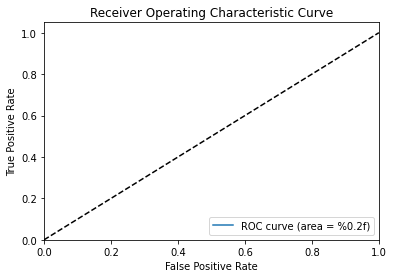

In [51]:
  # Plot the ROC curve

  plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)')
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic Curve')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

def compute_roc_curve(y_true, y_pred):
    # Compute the ROC curve and AUC for the given true labels and predictions
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

# **Part II - training data with different ML models**

### Generate a dataframe for training classifiers

In [ ]:
dataset_small=match_groudtruth(vcf_df_data,vcf_df_GT)
dataset_small

,QUAL,AO,DP,QA,QR,RO,RPL,SAF,SAR,SRF,SRR,GROUND
POS,,,,,,,,,,,,
3915,6.590090e+02,83,143,2760,2001,59,51,36,47,37,22,1
10452,1.704090e-09,65,133,2205,2317,68,33,30,35,39,29,0
12060,1.222290e-13,61,142,2087,2692,81,27,31,30,41,40,0
13072,3.108420e+01,67,129,2279,2120,62,39,32,35,24,38,1
15742,1.163890e+01,63,126,2143,2126,63,33,35,28,31,32,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1257121,8.622340e+01,67,123,2319,1857,55,33,39,28,23,32,1
1258432,9.341950e-14,51,119,1782,2309,68,26,24,27,42,26,0
1260309,2.007810e-09,55,110,1746,1870,55,25,34,21,20,35,1


### Data preparation

In [ ]:
#shuffle data
dataset_small=shuffle(dataset_small)
#standardize features
Ys = dataset_small.iloc[:,-1:]
Xs = dataset_small.iloc[:,0:11]
means = np.mean(Xs, axis = 0)
stdvs = np.std(Xs,axis = 0)
Xs = (Xs-means)/stdvs 
#Use stratified sampling and split data into training and testing
X_r, X_t, Y_r, Y_t = train_test_split(Xs, Ys, test_size = 0.33, stratify = Ys) 


## **Logistic regression classifier**

---



### Train simple logistic clasifier

Perform Grid search for finding best hyperparameter C for regularization. L2 regularization refers to the penalty which is equivalent to the square of the magnitude of coefficients, whereas L1 regularization introduces the penalty (shrinkage quantity) equivalent to the sum of the absolute value of coefficients. L1 regularization introduces sparsity in the dataset, and it can use to perform feature selection by eliminating the features that are not important. Lasso or L1 regularization shrinks the coefficients of not important features to 0, therefore those features can be removed from the training sample.

In [ ]:
param = {'C': [0.001,0.005,0.01, 0.05, 0.1, 0.5, 1, 5, 50, 100], 'solver': ['saga', 'liblinear']}
lr_model = LogisticRegression(penalty='l1', solver='liblinear') # check with penalty L1 maybe better
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
gs_model = GridSearchCV(estimator=lr_model, param_grid=param, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

gs_model.fit(X_r, Y_r.values.ravel())
# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_ )
model.fit(X_r, Y_r.values.ravel())

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=50, solver='saga')

In [ ]:
print("Best: %f using %s" % (gs_model.best_score_, gs_model.best_params_))
means = gs_model.cv_results_['mean_test_score']
stds = gs_model.cv_results_['std_test_score']
params = gs_model.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.969024 using {'C': 50, 'solver': 'saga'}
0.555556 (0.008571) with: {'C': 0.001, 'solver': 'saga'}
0.555556 (0.008571) with: {'C': 0.001, 'solver': 'liblinear'}
0.555556 (0.008571) with: {'C': 0.005, 'solver': 'saga'}
0.555556 (0.008571) with: {'C': 0.005, 'solver': 'liblinear'}
0.784478 (0.050287) with: {'C': 0.01, 'solver': 'saga'}
0.868227 (0.040732) with: {'C': 0.01, 'solver': 'liblinear'}
0.914972 (0.036622) with: {'C': 0.05, 'solver': 'saga'}
0.917396 (0.037349) with: {'C': 0.05, 'solver': 'liblinear'}
0.938036 (0.031204) with: {'C': 0.1, 'solver': 'saga'}
0.933187 (0.034768) with: {'C': 0.1, 'solver': 'liblinear'}
0.964759 (0.025436) with: {'C': 0.5, 'solver': 'saga'}
0.966566 (0.027189) with: {'C': 0.5, 'solver': 'liblinear'}
0.968406 (0.026722) with: {'C': 1, 'solver': 'saga'}
0.967778 (0.027031) with: {'C': 1, 'solver': 'liblinear'}
0.967800 (0.027027) with: {'C': 5, 'solver': 'saga'}
0.967194 (0.023786) with: {'C': 5, 'solver': 'liblinear'}
0.969024 (0.025039) with: {

Compute the coefficients of the Logistic Regression model which will return the weight vector of the logistic regression dividing plane for all of the features that were trained. Redundant features could be identified as they have coefficient with 0. 

In [ ]:
coef=model.coef_[0]
coef

array([ 0.14420193,  2.6043807 , -0.41178657,  1.94688341, -1.33228281,
       -2.40971166,  0.12406609,  2.41247887,  1.9951255 , -1.84342424,
       -1.91487265])

Check which features were redundant

In [ ]:
print("Redundant features are: ", list(pd.Series(Xs.columns)[list(coef==0)]))

Redundant features are:  []


Export features that are not redundant for training

In [ ]:
f_features = pd.Series(Xs.columns)[list(coef!=0)]
X_r = X_r[f_features]
X_t = X_t[f_features]


Train with l2 regularization?